#### downloading data

In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

import zipfile
with zipfile.ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
    zip_ref.extractall()
    
!del house-prices-advanced-regression-techniques.zip


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 9.27MB/s]


In [5]:
import pandas as pd
import numpy as np

with open('data_description.txt') as r:
    line = True
    while line:
        line = r.readline()
        print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

## EDA

In [503]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator

In [531]:
train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

train = train.set_index('Id')
X_test = X_test.set_index('Id')

X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns

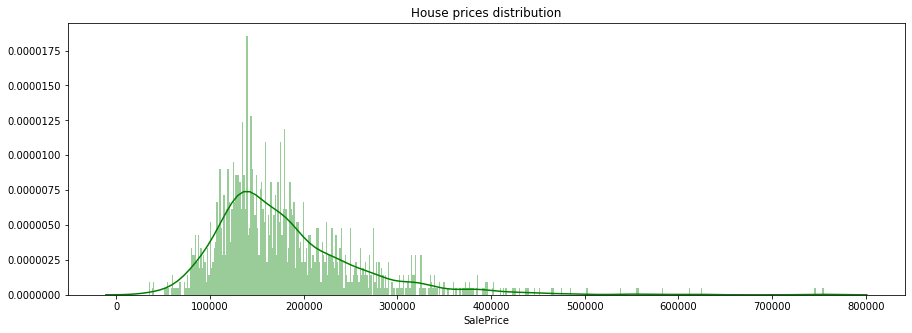

In [533]:
plt.figure(figsize=[15, 5])
sns.distplot(y_train, bins=500, color='g')
plt.title('House prices distribution')
plt.show()

In [534]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [535]:
print('train shape:', X_train.shape[0], 'rows,', X_train.shape[1], 'columns')
print('test shape:', X_test.shape[0], 'rows,', X_test.shape[1], 'columns')

train shape: 1460 rows, 79 columns
test shape: 1459 rows, 79 columns


In [536]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [537]:
# def feature_separator(df, max_categories=None):
#     if not max_categories:
#         max_categories = df.shape[0] / 100
        
#     num_features = []
#     cat_features = []

#     for col in X_train.columns:
#         if X_train[col].nunique() > max_categories:
#             num_features.append(col)
#         else:
#             cat_features.append(col)    
    
#     return cat_features, num_features


def feature_separator(df):
    cat_features = df.dtypes[df.dtypes==object].index.values
    num_features = df.dtypes[df.dtypes!=object].index.values
    
    return cat_features, num_features

In [538]:
cat_features, num_features = feature_separator(df=X_train)

In [539]:
def check_missing_values(train, test, features):
    train_missing = train[features].isna().sum()
    train_missing.name = 'train missing'
    train_missing_pct = train_missing / train.shape[0]
    train_missing_pct.name = 'train missing percentage'
    
    test_missing = test[features].isna().sum()
    test_missing.name = 'test missing'
    test_missing_pct = test_missing / test.shape[0]
    test_missing_pct.name = 'test missing percentage'
    
    missing = pd.concat([train_missing,
                         train_missing_pct,
                         test_missing,
                         test_missing_pct], axis=1)
    missing.sort_values(by='train missing percentage', ascending=False, inplace=True)
    
    return missing

In [540]:
def plot_missing_values(train, test, features):
    missing = check_missing_values(train=train, test=test, features=features)
    missing = missing.T.loc[['train missing percentage', 'test missing percentage']]
    y_pos = np.arange(len(missing.columns))
    
    plt.figure(figsize=[15, 5])
    plt.bar(x=y_pos, height=missing.loc['test missing percentage'])
    plt.xticks(y_pos, missing.columns, rotation=90)
    plt.show()

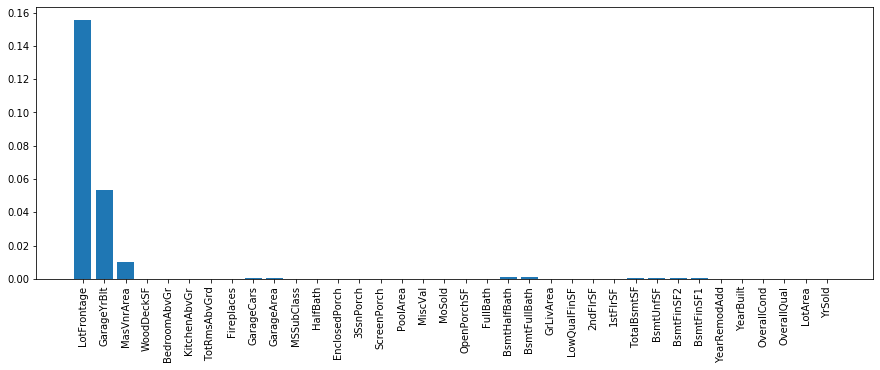

In [541]:
plot_missing_values(train=X_train, test=X_test, features=num_features)

In [542]:
check_missing_values(train=X_train, test=X_test, features=num_features)

,train missing,train missing percentage,test missing,test missing percentage
LotFrontage,259,0.177397,227,0.155586
GarageYrBlt,81,0.055479,78,0.053461
MasVnrArea,8,0.005479,15,0.010281
WoodDeckSF,0,0.000000,0,0.000000
BedroomAbvGr,0,0.000000,0,0.000000
KitchenAbvGr,0,0.000000,0,0.000000
TotRmsAbvGrd,0,0.000000,0,0.000000
Fireplaces,0,0.000000,0,0.000000
GarageCars,0,0.000000,1,0.000685
GarageArea,0,0.000000,1,0.000685


In [543]:
check_missing_values(train=X_train, test=X_test, features=cat_features)

,train missing,train missing percentage,test missing,test missing percentage
PoolQC,1453,0.995205,1456,0.997944
MiscFeature,1406,0.963014,1408,0.965045
Alley,1369,0.937671,1352,0.926662
Fence,1179,0.807534,1169,0.801234
FireplaceQu,690,0.472603,730,0.500343
GarageType,81,0.055479,76,0.052090
GarageCond,81,0.055479,78,0.053461
GarageQual,81,0.055479,78,0.053461
GarageFinish,81,0.055479,78,0.053461
BsmtFinType2,38,0.026027,42,0.028787


## Scale numerical features

In [544]:
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

## Impute missing values

In [545]:
imputer = SimpleImputer(strategy='mean')
one_hot_encoder = OneHotEncoder()

X_train[num_features] = imputer.fit_transform(X_train[num_features])
X_test[num_features] = imputer.transform(X_test[num_features])

## One Hot Encoding categorical features

In [546]:
X_train = pd.get_dummies(X_train, columns=cat_features)
X_test = pd.get_dummies(X_test, columns=cat_features)

X_train, X_test = X_train.align(X_test, join='inner', axis = 1)

In [547]:
X_train.shape, X_test.shape

((1460, 270), (1459, 270))

## Feature engineering

In [548]:
from sklearn.linear_model import Lasso
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, scorer
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

In [522]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBRFRegressor(learning_rate=0.02, n_estimators=100, silent=True)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = GridSearchCV(xgb,
                             param_grid=params,
                             scoring='neg_mean_squared_error',
                             n_jobs=4,
                             cv=skf.split(X_train, y_train),
                             verbose=3)

In [462]:
random_search.fit(X_train, y_train)

C:\Users\abdul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   31.7s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  2.9min finished
C:\Users\abdul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\abdul\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\abdul\

GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000020234C7A1C8>,
             error_score='raise-deprecating',
             estimator=XGBRFRegressor(base_score=0.5, colsample_bylevel=1,
                                      colsample_bynode=0.8, colsample_bytree=1,
                                      gamma=0, learning_rate=0.02,
                                      max_delta_step=0, max_depth=3,
                                      min_child_weight=1, missing=None,
                                      n_estimators=100, n_jobs=1, nthread=None,
                                      objective='reg:linear...
                                      reg_alpha=0, reg_lambda=1,
                                      scale_pos_weight=1, seed=None,
                                      silent=True, subsample=0.8, verbosity=1),
             iid='warn', n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_de

In [463]:
random_search.best_estimator_

XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=0.8, gamma=0.5, learning_rate=0.02,
               max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
               n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
               random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
               seed=None, silent=True, subsample=1.0, verbosity=1)

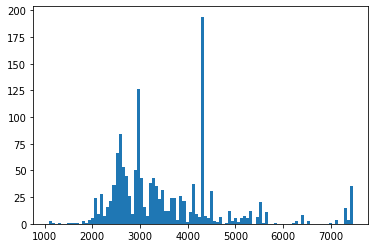

In [472]:
plt.hist(random_search.best_estimator_.predict(X_train), bins=100)
plt.show()

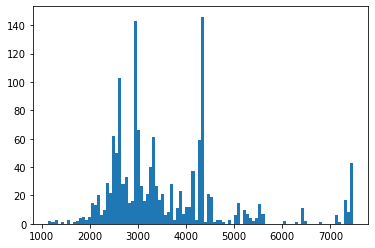

In [477]:
plt.hist(prediction, bins=100)
plt.show()

In [549]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# model = RidgeCV(cv=3)
# model = SVR()
model = RandomForestRegressor(criterion='mse')

model.fit(X_train, y_train)

C:\Users\abdul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [550]:
# model = random_search.best_estimator_

prediction = model.predict(X_test)
submission = pd.DataFrame({'Id': X_test.index, 'SalePrice': prediction})
submission.to_csv('submission.csv', index=False)

In [551]:
submission.sort_values(by='SalePrice')

,Id,SalePrice
1431,2892,53441.1
1428,2889,54199.3
387,1848,54790.0
362,1823,55320.0
939,2400,55640.0
...,...,...
1229,2690,459852.9
211,1672,460157.9
217,1678,461001.1
1222,2683,508224.0


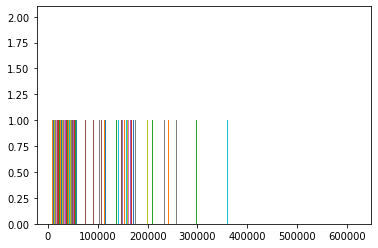

In [552]:
plt.hist(submission)
plt.show()

In [553]:
#xgb.fit(X_train, y_train, eval_metric='rmse')

In [558]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Notes"

403 - Your team has used its submission allowance (10 of 10). This resets at midnight UTC (6.2 hours from now).



  0%|          | 0.00/21.3k [00:00<?, ?B/s]
100%|##########| 21.3k/21.3k [00:04<00:00, 4.49kB/s]


In [557]:
!kaggle competitions submissions -c house-prices-advanced-regression-techniques 

fileName        date                 description  status    publicScore  privateScore  
--------------  -------------------  -----------  --------  -----------  ------------  
submission.csv  2020-01-08 14:44:54  Notes        complete  0.21047      None          
submission.csv  2020-01-08 13:59:27  Notes        complete  0.18688      None          
submission.csv  2020-01-08 13:50:56  Notes        complete  3.88175      None          
submission.csv  2020-01-08 13:38:23  Notes        complete  3.87644      None          
submission.csv  2020-01-08 13:11:02  Notes        complete  3.88686      None          
submission.csv  2020-01-08 13:10:30  Notes        complete  3.88670      None          
submission.csv  2020-01-08 00:45:11  Notes        complete  3.88670      None          
submission.csv  2020-01-08 00:42:19  Notes        complete  3.89206      None          
submission.csv  2020-01-08 00:30:11  Notes        complete  0.26239      None          
submission.csv  2020-01-08 00:23